# Customer Churn Analysis

### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

I will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In this project, I will create a predictive model that predicts if the customer churn from company or not.

WORK:

1) IMPORTING LIBRARIES

2) LOADING DATASET & DESCRIPTION

3) EXPLORATORY DATA ANALYSIS

4) DATA PREPROCESSING OF DATA

5) LABEL ENCODING

6) SPLITING DATA AND APPLYING train_test_split

7) SCALING

8) FINDING BEST RANDOM STATE

9) FINDING BEST ALGORITHM

10) AUC_ROC CURVE

11) SAVING OUR MODEL

12) RESULTS & CONCLUSION



#### TARGET VARIABLE:
In this context, the use classification models to predict the "Churn"(when a customer decides to ends their relationship with a company)

"Churn" is our target varaible.

In [1]:
# importinf libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset

df= pd.read_csv("Customer Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# first 5 rows of dataset

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#last 5 rows of dataset

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### The data set includes following information about attributes:

1) Churn------>Customers who left the business within last month.

2) 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport' 'StreamingTV', 'StreamingMovies'------>Services for which customer has signed up.

3) 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges'------->Customer account information about 
    how long they have been a customer with their business.

4) 'gender', 'SeniorCitizen', 'Partner', 'Dependents'------> Basically Demographic information about customer.




In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# DESCRIBING DATA

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


describe function only shows the variable which are numeric.

That's why our target varaible i.e. "Churn" is not showing beacuse it is given in object format.

In [10]:
# let's get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Look at the values in each columns 
for i in df:
    print(df[i].value_counts())
    print("____________________________________________________________")

1680-VDCWW    1
5214-NLTIT    1
4893-GYUJU    1
9717-QEBGU    1
0118-JPNOY    1
             ..
1450-SKCVI    1
2659-VXMWZ    1
8966-OIQHG    1
0780-XNZFN    1
4248-QPAVC    1
Name: customerID, Length: 7043, dtype: int64
____________________________________________________________
Male      3555
Female    3488
Name: gender, dtype: int64
____________________________________________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
____________________________________________________________
No     3641
Yes    3402
Name: Partner, dtype: int64
____________________________________________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
____________________________________________________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
____________________________________________________________
Yes    6361
No      682
Name: PhoneService, dt

# EXPLORATORY DATA ANALYSIS

#### Visualization of our target varaible:

No     5174
Yes    1869
Name: Churn, dtype: int64

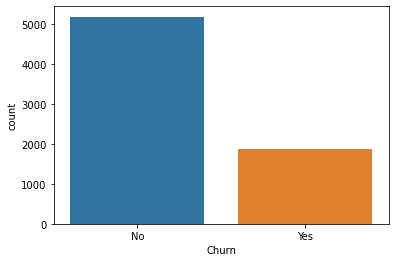

In [12]:
#Get the count of Churn(our target variable)

sns.countplot(x = 'Churn', data = df)
df["Churn"].value_counts()

Customers who have not left the services within the last month are higher in number than the customers who left services.

### Univariate analysis of Categorical varaibles:

In [13]:
df.select_dtypes(include=['object']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

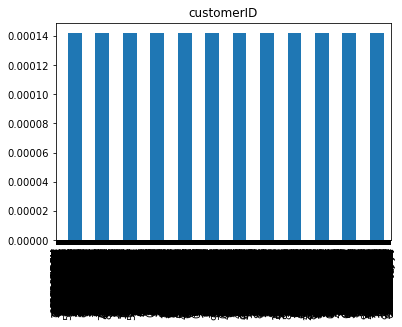

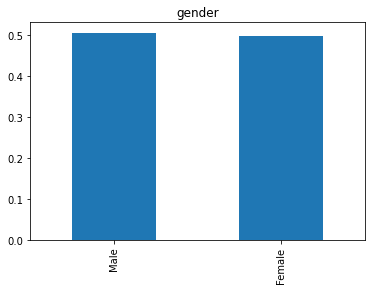

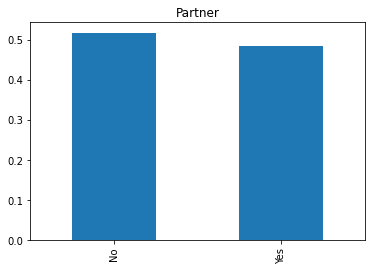

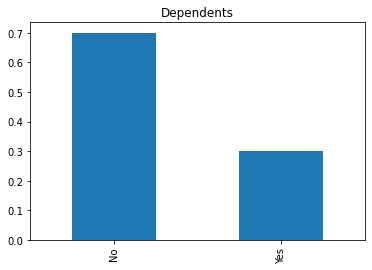

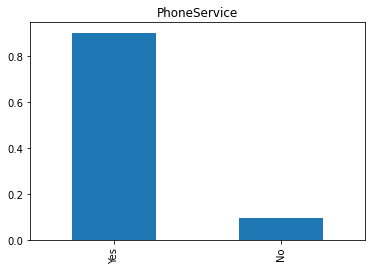

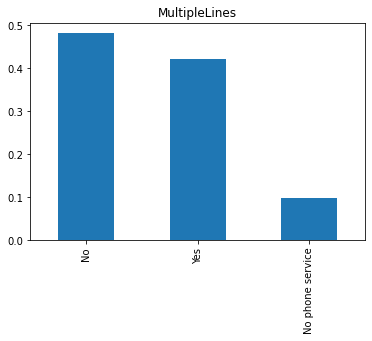

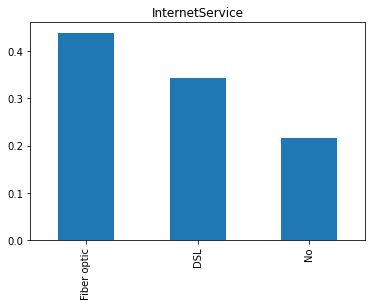

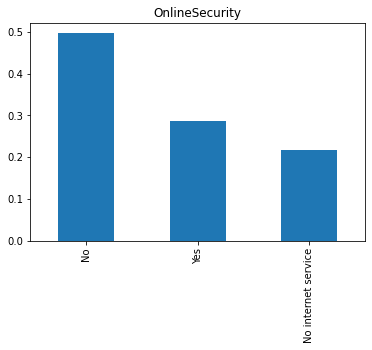

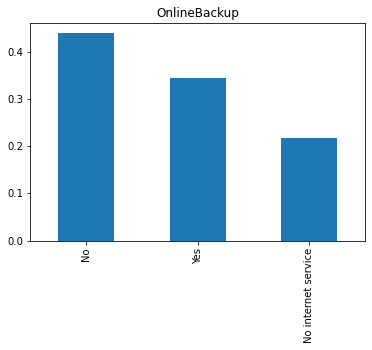

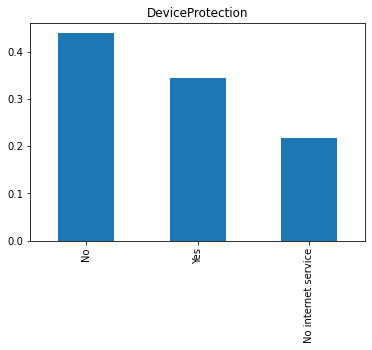

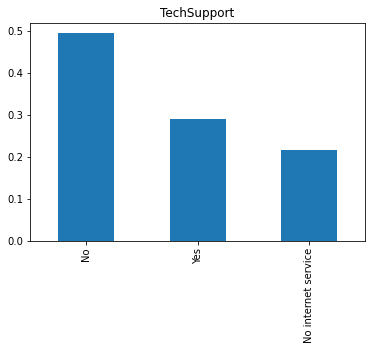

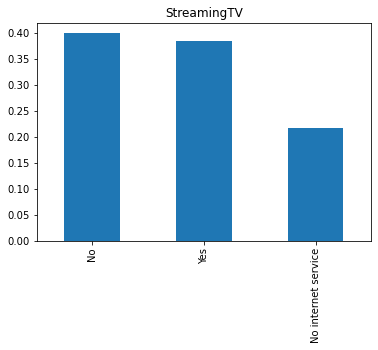

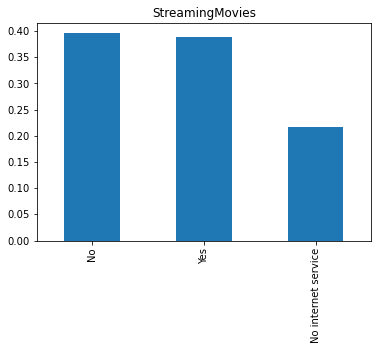

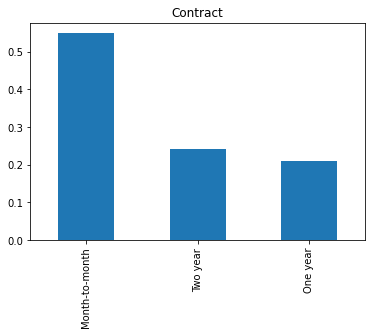

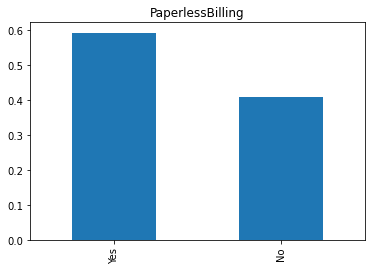

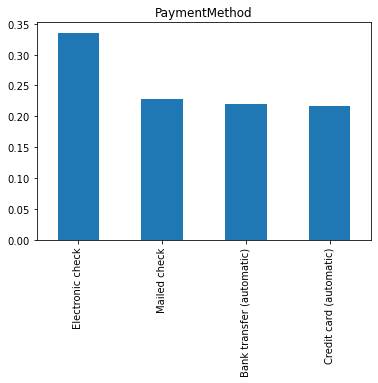

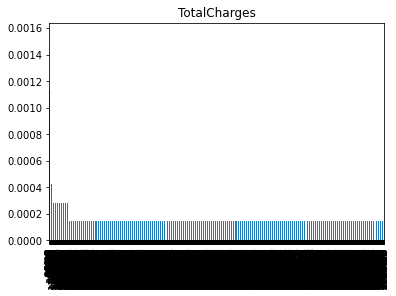

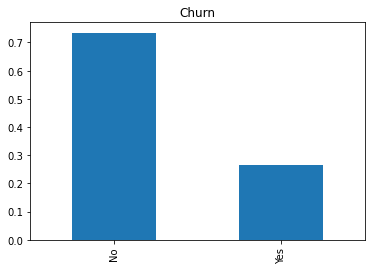

In [14]:
for i in df.columns:
    if df[i].dtypes== "object":
        df[i].value_counts(normalize=True).plot.bar(figsize=(6,4), title=i)
        plt.show()

OBSERVATIONS:

1) THe ration of males & females in dataset is equal.

2) Customers who have partners & the customers who don't have partners are equal in ratio.

3) 70% percent od customers don't have dependents.

4) 90% percent of customers are taking Phone services.

5) 45% percent of customers have Multiple Phone lines.

6) The most preferred Interner service is Fiber optic among customers.

7) 50% of people don't opt for online security.

8) Only 35% of customers took Online backup of services.

9) Only 35% of customers took Device Protection services.

10) Only 35% of customers take support from Tech bar.

11) Around 38% of customers streaming TV

12) Around 38% of customers streaming Movies.

13) 55% of customers preferred month to month services.

14) 60% of customers preferred paperless bills.



# Analysis of Categorical Independent Variable with Target variable

Text(0.5, 1.0, 'gender wrt Churn')

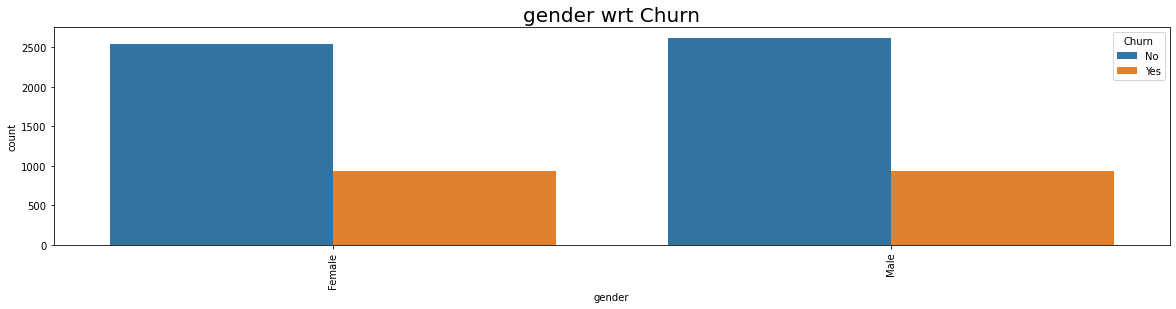

In [15]:
plt.subplots(figsize=(20,4))
sns.countplot(x="gender",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('gender wrt Churn', fontsize = 20)

we can visualize that there is an equal ration between Males & females.

Text(0.5, 1.0, 'Partner wrt Churn')

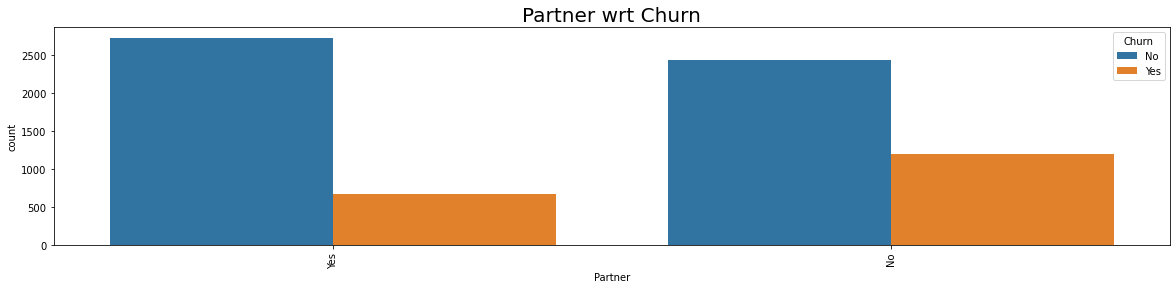

In [16]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Partner",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('Partner wrt Churn', fontsize = 20)

Customers have have partners are more and most of them have not stopped services.

Text(0.5, 1.0, 'Dependents wrt Churn')

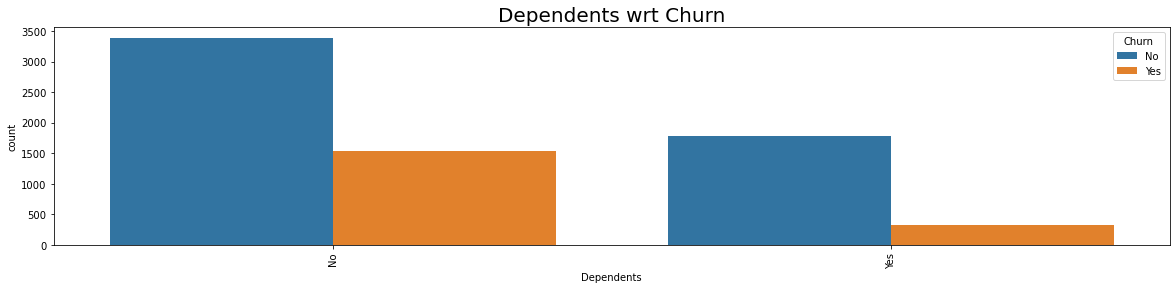

In [17]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Dependents",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('Dependents wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'PhoneService wrt Churn')

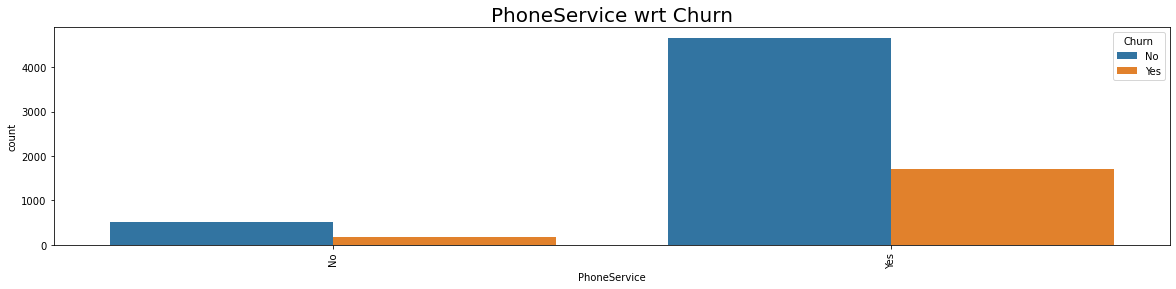

In [18]:
plt.subplots(figsize=(20,4))
sns.countplot(x="PhoneService",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('PhoneService wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'MultipleLines wrt Churn')

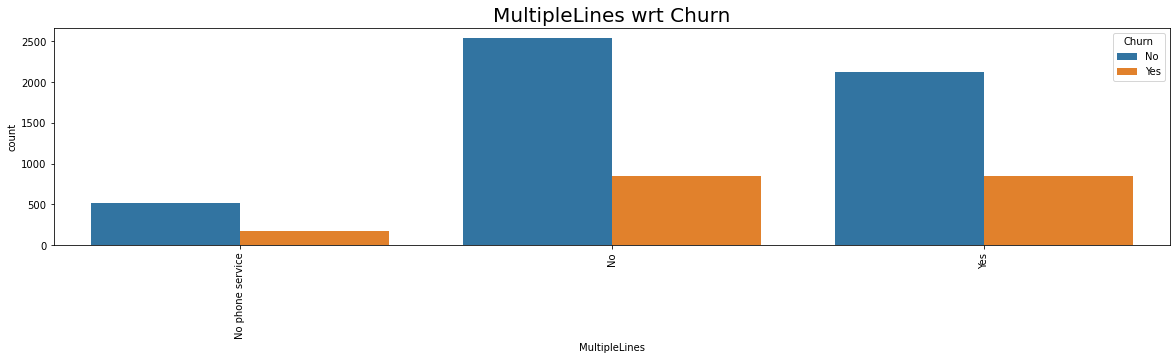

In [19]:
plt.subplots(figsize=(20,4))
sns.countplot(x="MultipleLines",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('MultipleLines wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'InternetService wrt Churn')

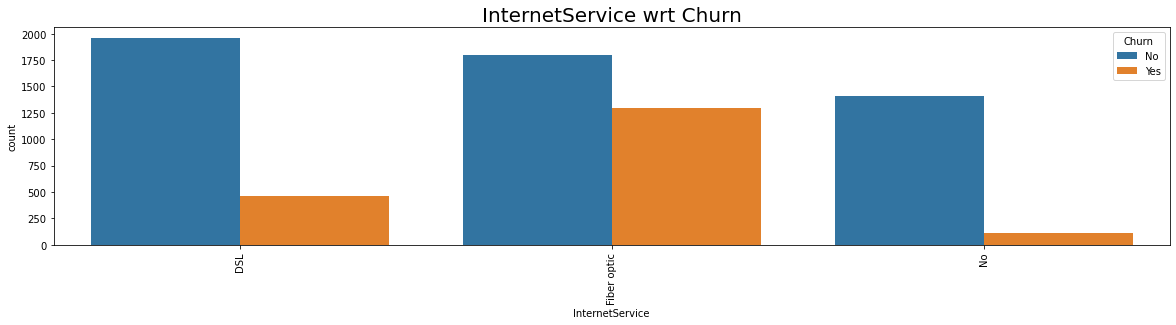

In [20]:
plt.subplots(figsize=(20,4))
sns.countplot(x="InternetService",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('InternetService wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'OnlineSecurity wrt Churn')

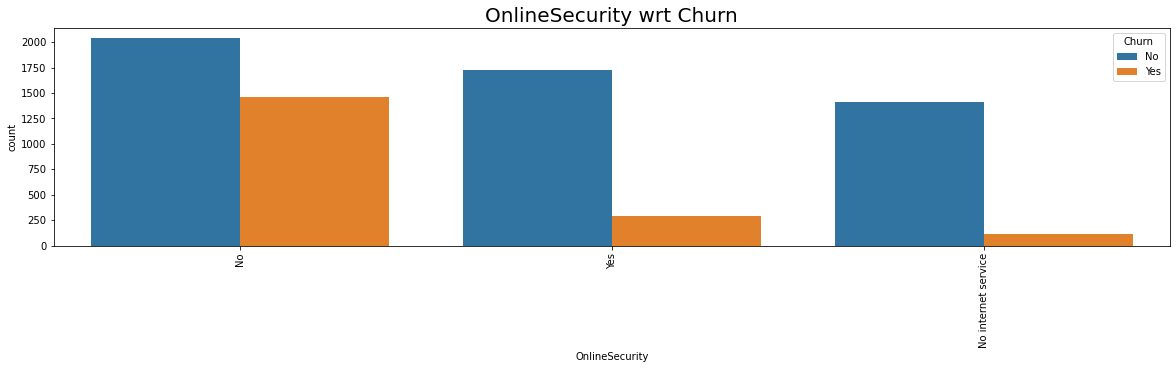

In [21]:
plt.subplots(figsize=(20,4))
sns.countplot(x="OnlineSecurity",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('OnlineSecurity wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'OnlineBackup wrt Churn')

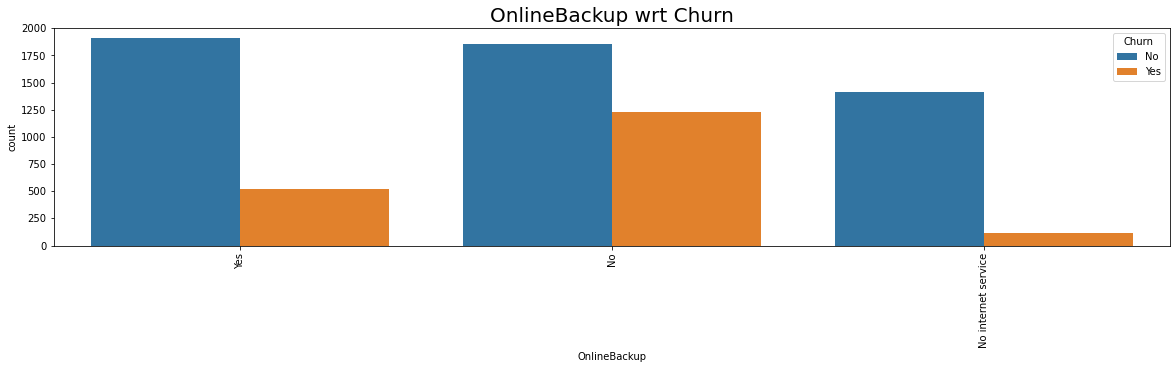

In [22]:
plt.subplots(figsize=(20,4))
sns.countplot(x="OnlineBackup",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('OnlineBackup wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'DeviceProtection wrt Churn')

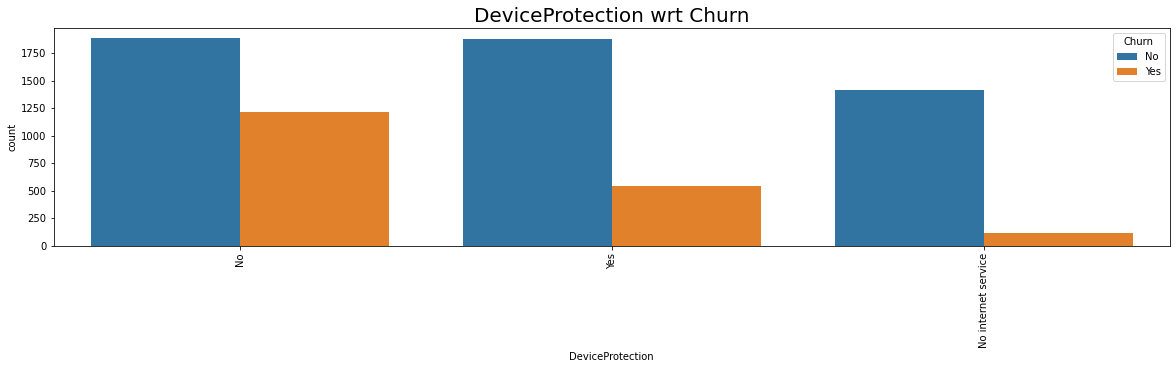

In [23]:
plt.subplots(figsize=(20,4))
sns.countplot(x="DeviceProtection",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('DeviceProtection wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'TechSupport wrt Churn')

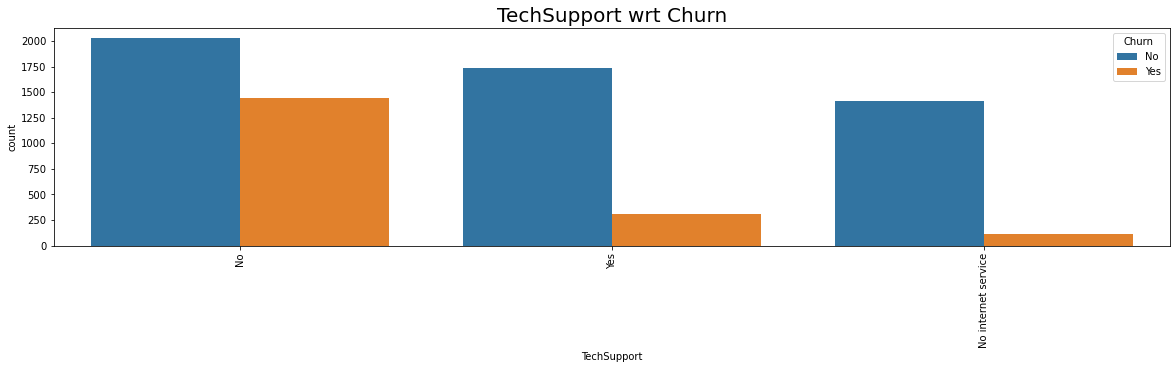

In [24]:
plt.subplots(figsize=(20,4))
sns.countplot(x="TechSupport",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('TechSupport wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'StreamingTV wrt Churn')

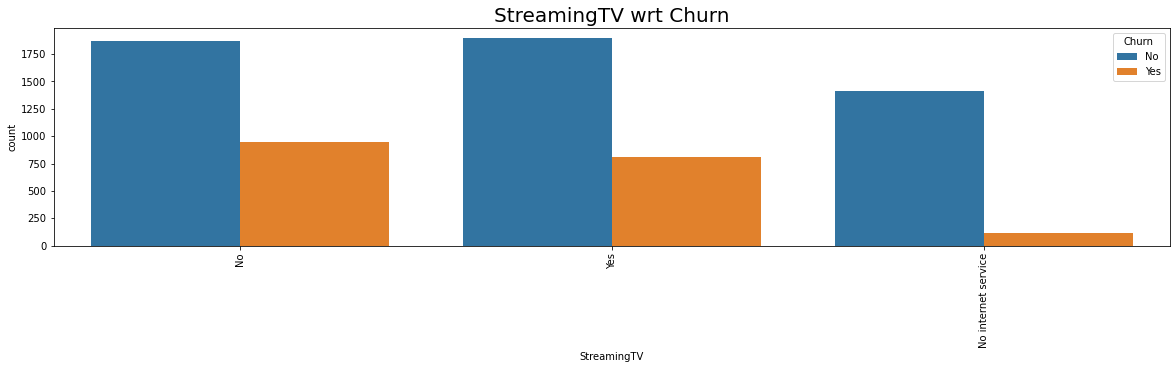

In [25]:
plt.subplots(figsize=(20,4))
sns.countplot(x="StreamingTV",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('StreamingTV wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'StreamingMovies wrt Churn')

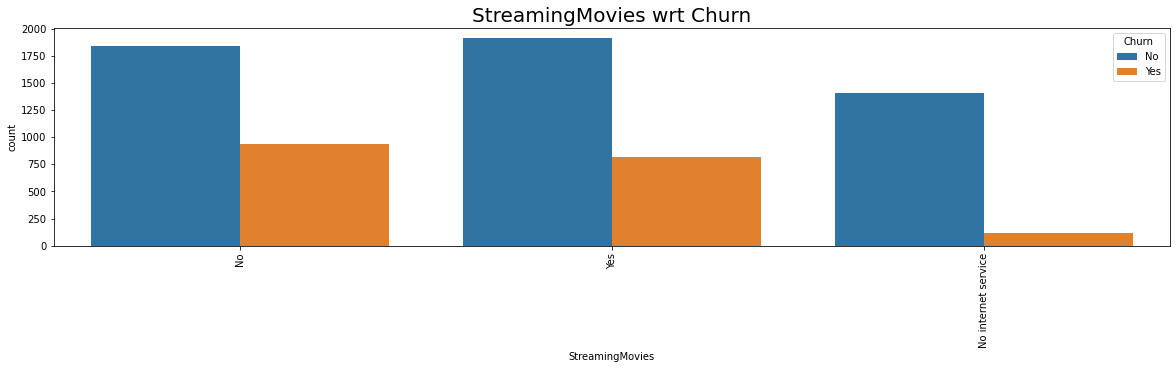

In [26]:
plt.subplots(figsize=(20,4))
sns.countplot(x="StreamingMovies",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('StreamingMovies wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'Contract wrt Churn')

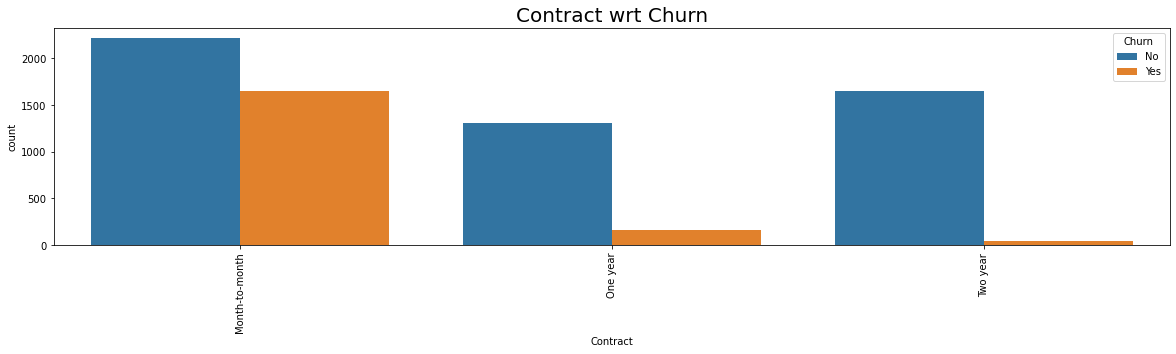

In [27]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Contract",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('Contract wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'PaperlessBilling wrt Churn')

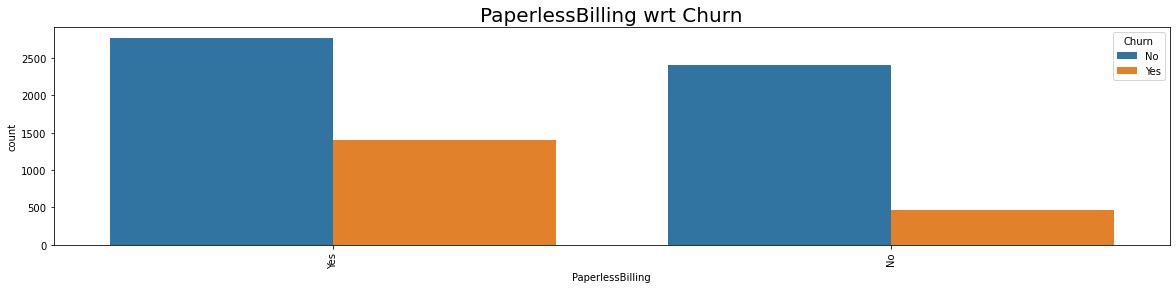

In [28]:
plt.subplots(figsize=(20,4))
sns.countplot(x="PaperlessBilling",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('PaperlessBilling wrt Churn', fontsize = 20)

Text(0.5, 1.0, 'PaymentMethod wrt Churn')

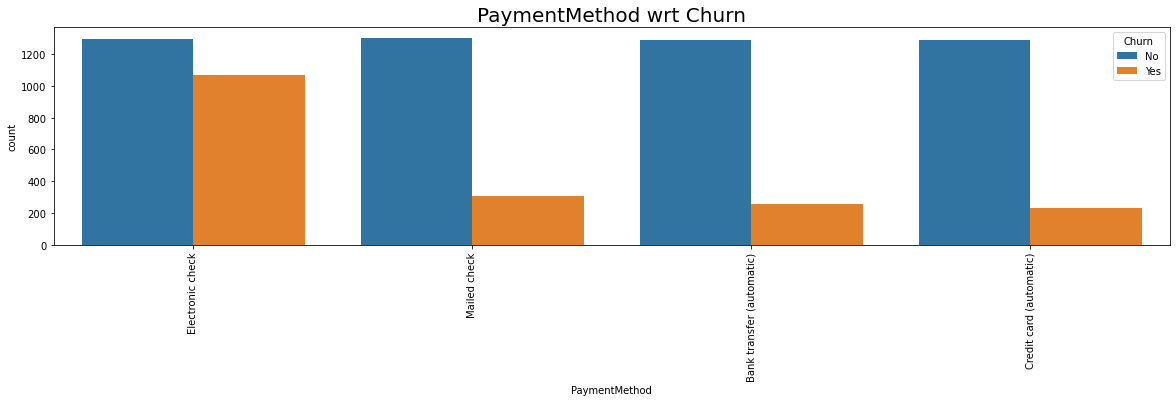

In [29]:
plt.subplots(figsize=(20,4))
sns.countplot(x="PaymentMethod",hue="Churn",data=df)
plt.xticks(rotation = 90)
plt.title('PaymentMethod wrt Churn', fontsize = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DACC609A0>,
      dtype=object)

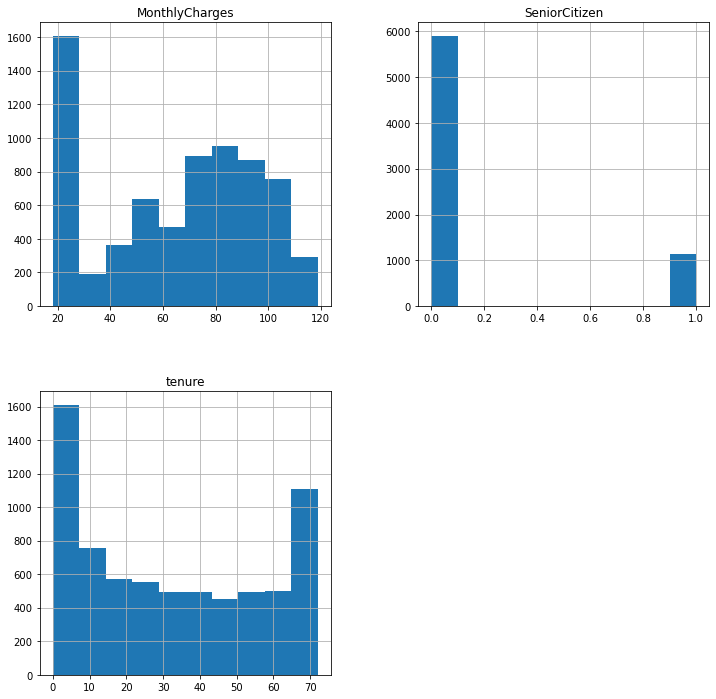

In [30]:
# we use histogram for showing our continous variables.

df.hist(figsize=(12,12),sharex=False)

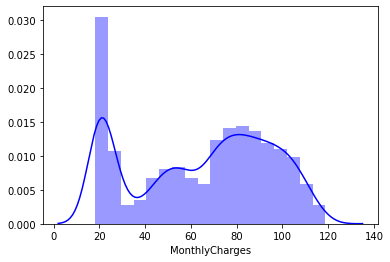

In [31]:
# checking skewness for continous variables.

sns.distplot(df["MonthlyCharges"], kde=True,color = 'blue')

"MonthlyCharges" is normally distributed.

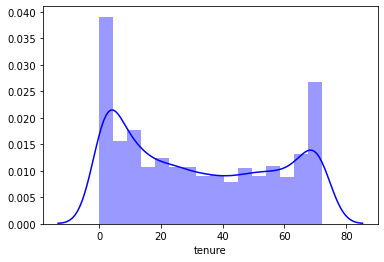

In [32]:
sns.distplot(df["tenure"], kde=True,color = 'blue')

"tenure" is normally distributed.

# DATA PRE-PROCESSING

##### CLEANING OUR DATASET

Data Cleaning and pre-processing is very important part to create any machine learning model. The cleaner the data will be, the better the prediction will come.

This data provided is raw and we have to run many functions to clean.

In [33]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see that there is no NaN value present in our data.

In [34]:
# check unique values in dataset

df.apply(lambda x: len(x.unique()))

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

##### Droping irrelevant columns:

In [35]:
df.drop('customerID',axis=1,inplace=True)

 It has all the unique values.
Therefore, "customerID" is contributing nothing to our predictions.

##### some blank spaces are present in our datatset

In [36]:
# looking " " is present in which columns:

symbol = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == " ")
        symbol[i] = j
symbol = pd.DataFrame.from_dict(symbol, orient = 'index')
print(symbol)

                   0
gender             0
Partner            0
Dependents         0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
DeviceProtection   0
TechSupport        0
StreamingTV        0
StreamingMovies    0
Contract           0
PaperlessBilling   0
PaymentMethod      0
TotalCharges      11
Churn              0


Blank spaces are only present in one variable i.e. TotalCharges

In [37]:
## looking for rows in which blank spaces is present in "TotalCharges"

df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [38]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [40]:
df['TotalCharges'].isnull().sum()

11

In [41]:
## replacing NaN values with mean

df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [42]:
## Again checking null values

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# LabelEncoding

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# encoding the columns which are in string format into numeric format

for i in df.columns:
    if df[i].dtypes== "object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [44]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# FINDING CORRELATION

In [45]:
corr= df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


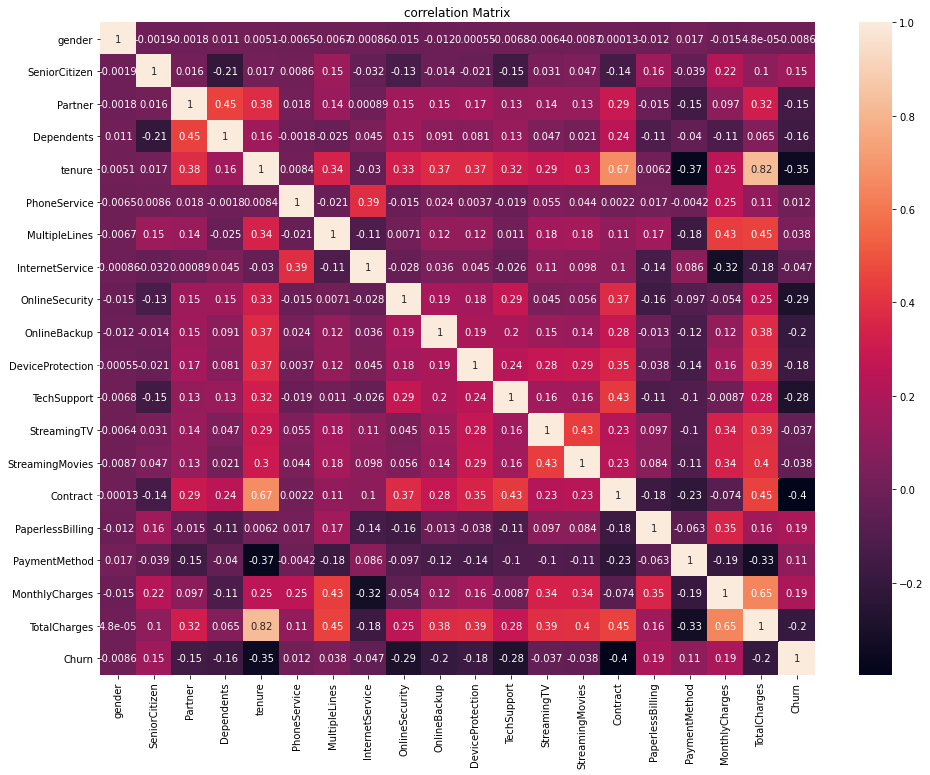

In [46]:
corr_mat=df.corr()   

plt.figure(figsize=[16,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [47]:
corr_matrix=df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

OBSERVATIONS:

We can visualize that there is no attribute which have a strong positive or Negative relationship with our Target Varaible i.e. "Churn".

There is a good positive relation between tenure & contract.

There is a strong positive correlation between tenure & Total charges.

There is a good positive relationship between Total charges & Monthly Charges.


<function matplotlib.pyplot.show(*args, **kw)>

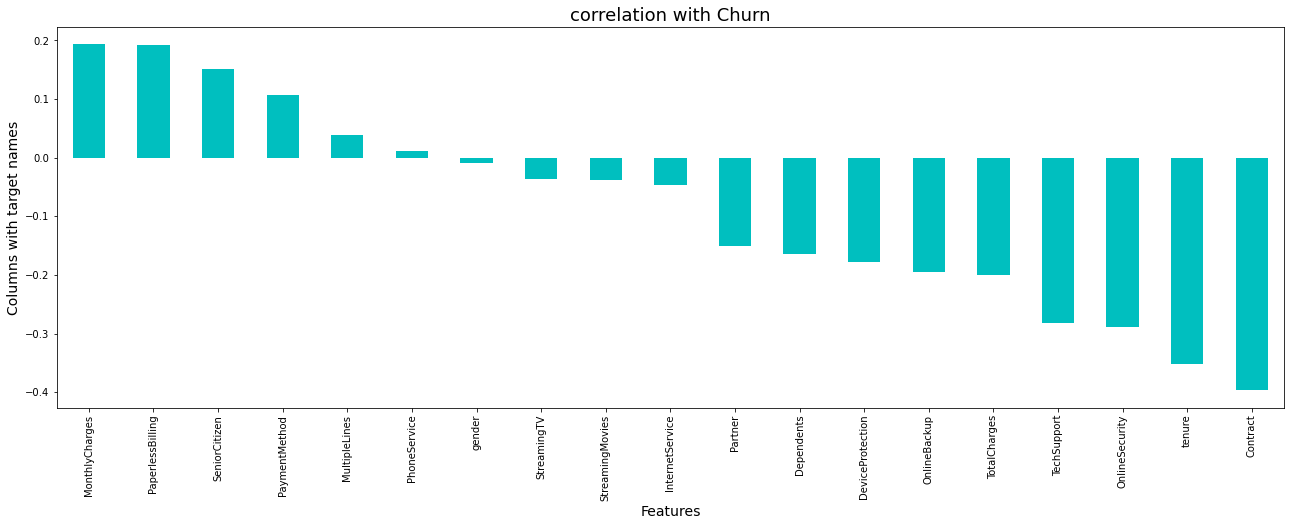

In [48]:
plt.figure(figsize=(22,7))
df.corr()["Churn"].sort_values(ascending=False).drop(["Churn"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation with Churn",fontsize=18)
plt.show

# Checking outliers

In [49]:
# checking ouliers only of varaibles which were provided in numeric format.

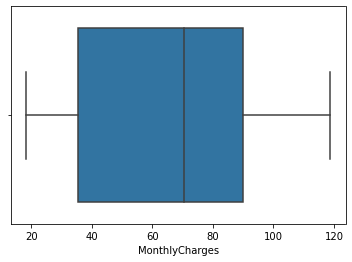

In [50]:
sns.boxplot(df["MonthlyCharges"])

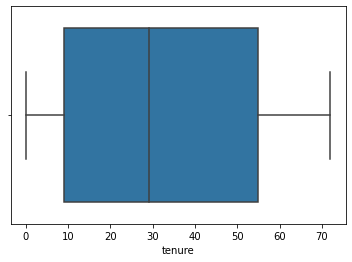

In [51]:
sns.boxplot(df["tenure"])

###### No Outliers present in our dataset.

# Splitting the data into X & Y

In [52]:
x= df.drop("Churn",axis=1)     # independent variable
y= df["Churn"]                 # dependent variable

In [53]:
x.columns.size

19

In [54]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

# SCALING

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [56]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.227521
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847461
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.037809
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.033210


Now every column value is between 0 & 1. We can compare the data more accurately

# FINDING BEST RANDOM STATE

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.8261178140525195 on Random_state 35


# CREATING TRAIN TEST SPLIT

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
LR=LogisticRegression()
svc= SVC()
rf=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn= KNeighborsClassifier()

In [60]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=35)
for i in (LR, svc, dtc, rf,knn):
    i.fit(x_train, y_train)
    
    pred = i.predict(x_test)
    
    print(i, accuracy_score(y_test,pred))

LogisticRegression() 0.8261178140525195
SVC() 0.8147622427253371
DecisionTreeClassifier() 0.7416607523066004
RandomForestClassifier() 0.808374733853797
KNeighborsClassifier() 0.765791341376863


# CROSS_VALIDATION_SCORE

In [61]:
from sklearn.model_selection import cross_val_score

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=35)

for i in (LR, svc, dtc, rf,knn):
    scr=cross_val_score(i,x,y,cv=5)
    print("cross validation score",i,"=", scr.mean()) 

cross validation score LogisticRegression() = 0.8013634952254984
cross validation score SVC() = 0.7983828593780243
cross validation score DecisionTreeClassifier() = 0.7263947472417576
cross validation score RandomForestClassifier() = 0.7912846191689786
cross validation score KNeighborsClassifier() = 0.7515254008323117


In [62]:
# we will proceed with Logistic Regression as it has minimum difference b/w accuracy_score & cross_Val_score.

In [63]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=35)
LR.fit(x_train,y_train)

LogisticRegression()

# AUC_ROC CURVE

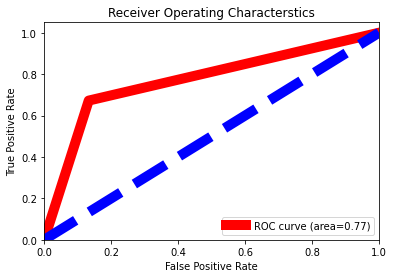

In [64]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(LR.predict(x_test),y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=10, label="ROC curve (area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color="blue", lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics")
plt.legend(loc="lower right")
plt.show()

# SAVING OUR MODEL

In [65]:
import pickle
filename= "CustomerChurn_LR.pkl"
pickle.dump(LR,open(filename,"wb"))

# LOAD THE MODEL

In [66]:
loaded_model=pickle.load(open("CustomerChurn_LR.pkl","rb"))

result= loaded_model.score(x_test,y_test)
print(result)

0.8261178140525195


# RESULT:

In [67]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],LR.predict(x_test)[:]],index=["predicted","original"])

In [68]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
predicted,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,1
original,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,1
